MIS 382N: ADVANCED MACHINE LEARNING

Assignment 4

Total points: 75 + 5 bonus points

Due: Monday, November 2 to be submitted via Canvas by 11:59 pm

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names and UT EIDs.**

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

**Additionally, upload any images you plan to incorporate in your notebook as attachments so we can see them in case the uploaded images don't appear properly on our end.**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name:

EID:

Name:

EID:

# Question 1: Expected Loss Minimization [10 pts]
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & r & c  \\
   & C2 & s & 0 & c \\
  \end{array} } 
$$

where the cost of rejection is a constant, and the costs $r$ and $s$ are positive real numbers. Let $f(x)=P(C1|x)$.

**(a) [2.5 points]** Show that the expected loss when $x$ is labelled as $C_1$ is a decreasing function of $f(x)$ while expected loss when $x$ is labelled as $C_2$ is a increasing function of $f(x)$.  
![partA.jpg](partA.jpg)

**(b) [2.5 points]** For $c=0$, show that the decision which minimizes the expected loss is to reject all instances of $x$
![partB.jpg](partB.jpg)

**(c) [2.5 points]** Let $r=5$ and $s=2$, what is the minimum value of $c$ such that no instance of $x$ gets rejected (irrespective of  $f(x)$)?
![partC.jpg](partC.jpg)

**(d) [2.5 points]** Let $r=7$, $s=4$, and $c=3$. Determine the  ranges of $f(x)$ for which the optimal decision is C1, reject and C2 respectively.
![partD.jpg](partD.jpg)

# Question 2: Logistic Regression [5 points]
Consider the problem of predicting the success of students in their undergraduate degrees given their high school GPA and SAT scores. We have the variables $X_1 =$ high school GPA, $X_2$ = SAT score and Y = completing the undergraduate degree (binary). We then fit a logistic regression which produces coefficients, $β_0 = −7$, $β_1 = 2$, $β_2 = 0.001$ Estimate the probability that George who
has a GPA of 3.4 and an SAT score of 1500 will complete his undergraduate degree successfully according to this model. By how much will the probability increase if the GPA increases to 3.7, with other factors remaining the same?

P = $\frac{1}{1+e^{-(\beta_0+\beta_1*X_1+\beta_2*X2)}}$
<br>
With a GPA of 3.4: P = $\frac{1}{1+e^{-(-7+2*3.4+0.001*1500)}}$ = 0.7858.
<br>
When GPA increases to 3.7: P = $\frac{1}{1+e^{-(-7+2*3.7+0.001*1500)}}$ = 0.8699.
<br>
Therefore, if the GPA increases to 3.7, the probability that George will complete his undergraduate degree increases by (0.8699-0.7858) = 0.0841 or about 8.41%.


# Question 2: Classification and Handling Class Imbalance [35 points + 5 bonus points]

In [16]:
# # Only use this code block if you are using Google Colab.
# # If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
# from google.colab import files

# ## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
# ## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
# uploaded = files.upload()

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

df = pd.read_csv('customer_churn_telcom.csv')
#Drop the Unnamed:0 column
df = df.drop(['Unnamed: 0'], axis=1)

In [18]:
# Printing the first five rows
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


## [5 points] Data Preprocessing 

(a) [1 pt] Some of the columns have values like - no internet service or no phone service. Replace these two values with with a simple No

In [20]:
# Replace values with No
df['MultipleLines'].replace('No phone service', 'No', inplace=True)
df['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
df['OnlineBackup'].replace('No internet service', 'No', inplace=True)
df['DeviceProtection'].replace('No internet service', 'No', inplace=True)
df['TechSupport'].replace('No internet service', 'No', inplace=True)
df['StreamingTV'].replace('No internet service', 'No', inplace=True)
df['StreamingMovies'].replace('No internet service', 'No', inplace=True)

(b) [1 pt] Convert all 'Yes' values to 1 and 'No' values to 0 <br>
(c) [1 pt] Convert all  'Female' values to 1 and 'Male' values to 0

In [21]:
# Changing values to 0/1

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)
df['gender'].replace({'Female':1,'Male':0},inplace=True)

(d) [2 pts] Perform one-hot encoding on the folowing columns: 'InternetService', 'Contract', 'PaymentMethod'

In [22]:
# One hot encoding for categorical columns
# Name your final dataframe df 2

# Your code here
categorical_cols = ['InternetService','Contract','PaymentMethod']

df2 = pd.get_dummies(df, columns=categorical_cols)

In [23]:
# Scaling
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

e) [1 pt] Split the dataset into training and test using a 80-20 split with a random state of 15. Perform stratified sampling on the target variable while doing so. Split the training data further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [24]:
# Train test split
X = df2.drop('Churn', axis=1)
y = df2['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=15,stratify=y_train)

In [25]:
# With samples corresponding to the positive class being very low, we can clearly see the imbalance in our data 
print('Churn occurences in the training set \n', y_train.value_counts())
print('\n')
print('Churn occurences throughout the data \n', y.value_counts())

Churn occurences in the training set 
 0    3304
1    1196
Name: Churn, dtype: int64


Churn occurences throughout the data 
 0    5163
1    1869
Name: Churn, dtype: int64


## [15 points] Decision Trees, Logistic Regression, and MLP

Use the example provided [here](https://scikit-learn.org/stable/modules/tree.html) to get an idea of how to use sklearn's decision tree classifier.

Go through the documentation [here](https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html) to understand how to use sklearn's logistic regression model.

Go through the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) to understand how to use sklearn's MLP Model.

(a) [5 pts (+5 bonus points)] Train the three classifiers on the dataset and print confusion matrix on both - the validation data as well as the test data for all the three models (you can either use default parameters for MLP classifier or change them to obtain higher performance for additional bonus of 5 points). <br>
(b) [5 pts] Plot the ROC Curves for all the three classifiers in a single graph and display the AUC-ROC scores for all the classifiers in this plot as well. Use both the validation and the test data to plot these curves as well as to calculate the AUC-ROC scores. Use one graph for validation data and one graph for test data (all models for validation data in one graph and all models for test data in one graph - and use this scheme for plotting in all subsequent plotting questions). <br>
(c) [5 pts] Plot the Precision-Recall curves for all the three classifiers in a single graph. Use both the validation and the test data to plot these curves. Use one graph for validation data and one graph for test data.

Helpful resources can be found here - 
1. [sklearn.tree.DecisionTreeClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
2.  [sklearn.linear_model.LogisticRegression.score](https://github.com/scikit-learn/scikit-learn/blob/37ac6788c/sklearn/base.py#L625)
3. [sklearn.neutral_network.MLPClassifier.score](https://github.com/scikit-learn/scikit-learn/blob/36958fb24/sklearn/base.py#L640)
4. [sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)
5. [sklearn.metrics_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Note: In this question, we are using the default parameters for MLP classifier, but you can change these parameters to obtain higher accuracies. **For a bonus of 5 points, experiment with these parameters to obtain a higher performance (in terms of accuracy and AUC-ROC scores).**

In [26]:
# Decision Tree Classifier
from sklearn import tree
from sklearn.metrics import confusion_matrix

# Answer here
clf = tree.DecisionTreeClassifier(random_state=15)
clf = clf.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = clf.predict(X_valid)
print('Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = clf.predict(X_test)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))

Validation Confusion Matrix:
[[652 174]
 [149 150]]
Validation Accuracy: 0.7129
Test Confusion Matrix:
[[836 197]
 [197 177]]
Test Accuracy: 0.72


In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# Answer here
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = log_mod.predict(X_valid)
print('Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = log_mod.predict(X_test)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))

Validation Confusion Matrix:
[[734  92]
 [143 156]]
Validation Accuracy: 0.7911
Test Confusion Matrix:
[[929 104]
 [170 204]]
Test Accuracy: 0.8053


In [77]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
# Answer here
mlp_orig = MLPClassifier(random_state=15)
mlp_orig.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = mlp_orig.predict(X_valid)
print('Original Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Original Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = mlp_orig.predict(X_test)
print('Original Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Original Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))

Original Validation Confusion Matrix:
[[659 167]
 [123 703]]
Original Validation Accuracy: 0.8245
Original Test Confusion Matrix:
[[808 225]
 [136 238]]
Original Test Accuracy: 0.7434


C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## EXTRA CREDIT - Tuning MLP Parameters

In [87]:
#Set up a variety of possible hyperparameters that we'll pefrom a grid search on
parameter_space = {
    'hidden_layer_sizes': [(50,),(100,)],
    'activation': ['tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf2 = GridSearchCV(mlp_orig, parameter_space, n_jobs=-1, cv=5)
clf2.fit(X_train, y_train)
clf2.best_params_

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant'}

In [83]:
mlp_tuned = MLPClassifier(random_state=15, alpha=0.01)
mlp_tuned.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = mlp_tuned.predict(X_valid)
print('Tuned Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Tuned Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = mlp_tuned.predict(X_test)
print('Tuned Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Tuned Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))

Tuned Validation Confusion Matrix:
[[663 163]
 [117 709]]
Tuned Validation Accuracy: 0.8305
Tuned Test Confusion Matrix:
[[808 225]
 [133 241]]
Tuned Test Accuracy: 0.7456


C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


After doing a grid search to find the optimal comibination of possible parameters that we provided, all we ended up changing from the default MLP parameters was an alpha of 0.01 instead of 0.0001. This improved both our validation and test accuracy slightly and led to about the same AUC's in the ROC curves below.

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :fu

Text(0.5, 1.0, 'ROC Curve for Test Data')

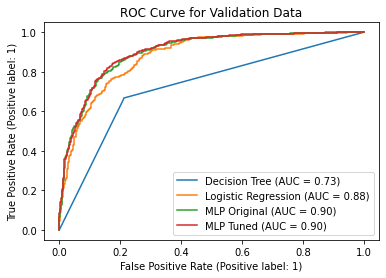

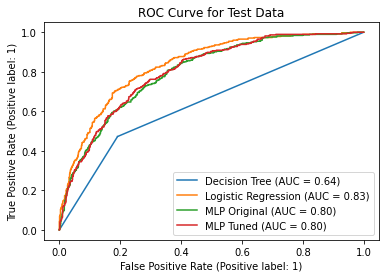

In [86]:
# Plot ROC curves
fig, ax = plt.subplots()
metrics.plot_roc_curve(clf, X_valid, y_valid, ax=ax, name='Decision Tree')
metrics.plot_roc_curve(log_mod, X_valid, y_valid, ax=ax, name='Logistic Regression')
metrics.plot_roc_curve(mlp_orig, X_valid, y_valid, ax=ax, name='MLP Original')
metrics.plot_roc_curve(mlp_tuned, X_valid, y_valid, ax=ax, name='MLP Tuned')
plt.title('ROC Curve for Validation Data')

fig2, ax2 = plt.subplots()
metrics.plot_roc_curve(clf, X_test, y_test, ax=ax2, name='Decision Tree')
metrics.plot_roc_curve(log_mod, X_test, y_test, ax=ax2, name='Logistic Regression')
metrics.plot_roc_curve(mlp_orig, X_test, y_test, ax=ax2, name='MLP Original')
metrics.plot_roc_curve(mlp_tuned, X_test, y_test, ax=ax2, name='MLP Tuned')
plt.title('ROC Curve for Test Data')

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_re

Text(0.5, 1.0, 'PR Curve for Test Data')

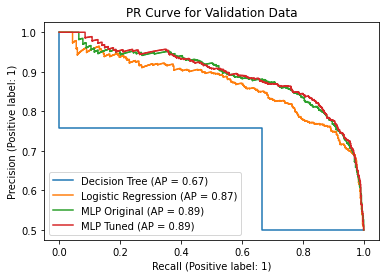

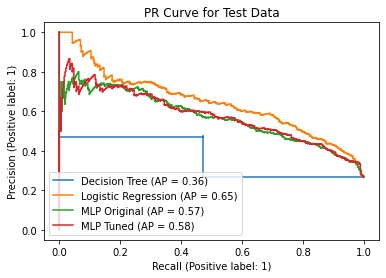

In [85]:
# Plot PR curves
fig, ax = plt.subplots()
metrics.plot_precision_recall_curve(clf, X_valid, y_valid, ax=ax, name='Decision Tree')
metrics.plot_precision_recall_curve(log_mod, X_valid, y_valid, ax=ax, name='Logistic Regression')
metrics.plot_precision_recall_curve(mlp_orig, X_valid, y_valid, ax=ax, name='MLP Original')
metrics.plot_precision_recall_curve(mlp_tuned, X_valid, y_valid, ax=ax, name='MLP Tuned')
plt.title('PR Curve for Validation Data')

fig2, ax2 = plt.subplots()
metrics.plot_precision_recall_curve(clf, X_test, y_test, ax=ax2, name='Decision Tree')
metrics.plot_precision_recall_curve(log_mod, X_test, y_test, ax=ax2, name='Logistic Regression')
metrics.plot_precision_recall_curve(mlp_orig, X_test, y_test, ax=ax2, name='MLP Original')
metrics.plot_precision_recall_curve(mlp_tuned, X_test, y_test, ax=ax2, name='MLP Tuned')
plt.title('PR Curve for Test Data')

## [4 points] Handling Class Imbalance with SMOTE

Go through the documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) to understand how to use imbalanced-learn's SMOTE to counter class imbalance in the data.

(a) [1 pt] Split the data into training (80%) and test sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15,stratify=y)


(b) [2 pts] Perform SMOTE on the training data and print the value counts of the target variable in the data.

In [34]:
# To install imbalanced-learn library use pip install imbalanced-learn command

from imblearn.over_sampling import SMOTE

# Answer here
sm = SMOTE(random_state=15)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(y_train.value_counts())

0    4130
1    4130
Name: Churn, dtype: int64


(c) [1 pt] Split the updated training data (on which SMOTE has been run) further into training (80%) and validation sets (20%) with a random state of 15. Perform stratified sampling on the target variable while doing so.

Note: The 'stratify' parameter can be used for this in the train_test_split function. 

In [35]:
# Answer here
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=15,stratify=y_train)

In [36]:
# Number of classes in training Data
y_train.value_counts()

0    3304
1    3304
Name: Churn, dtype: int64

In [37]:
# Number of classes in validation Data
y_valid.value_counts()

0    826
1    826
Name: Churn, dtype: int64

## [2 points] Retraining the Classifiers

Now that we have created synthetic samples of the minority class, let's proceed further to see if we see any improvements in our results. For the two models - Logistic regressor and MLP, do the folowing:

(a) [1 pt] Train a model on the training dataset. <br>
(b) [1 pt] Make predictions on the test data using the trained model and print confusion matrix for both - the validation and the test data.

In [38]:
# Logistic Regression
log_mod = LogisticRegression()
log_mod.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = log_mod.predict(X_valid)
print('Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = log_mod.predict(X_test)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))
#Get inputs for ROC curve below
lr_fpr_valid, lr_tpr_valid, _ = metrics.roc_curve(y_valid, y_valid_pred)
lr_fpr_test, lr_tpr_test, _ = metrics.roc_curve(y_test, y_test_pred)
lr_auc_valid = round(metrics.roc_auc_score(y_valid, y_valid_pred), 4)
lr_auc_test = round(metrics.roc_auc_score(y_test, y_test_pred), 4)
#Get inputs for PR curve below
lr_precision_valid, lr_recall_valid, _ = metrics.precision_recall_curve(y_valid, y_valid_pred)
lr_precision_test, lr_recall_test, _ = metrics.precision_recall_curve(y_test, y_test_pred)

Validation Confusion Matrix:
[[616 210]
 [130 696]]
Validation Accuracy: 0.7942
Test Confusion Matrix:
[[796 237]
 [ 93 281]]
Test Accuracy: 0.7655


In [88]:
# MLP
mlp = MLPClassifier(random_state=15)
mlp.fit(X_train, y_train)
#Validation Confusion Matrix
y_valid_pred = mlp.predict(X_valid)
print('Validation Confusion Matrix:')
print(confusion_matrix(y_valid, y_valid_pred))
print('Validation Accuracy:', round(metrics.accuracy_score(y_valid, y_valid_pred),4))
#Test Confusion Matrix
y_test_pred = mlp.predict(X_test)
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Accuracy:', round(metrics.accuracy_score(y_test, y_test_pred),4))

Validation Confusion Matrix:
[[659 167]
 [123 703]]
Validation Accuracy: 0.8245
Test Confusion Matrix:
[[808 225]
 [136 238]]
Test Accuracy: 0.7434


C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## [9 points] Plotting and Comparison
a) [1 pt] For the two classifiers (Logistic regression and MLP) - plot the ROC Curves in a single graph, display the AUC-ROC scores in this plot as well on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
b) [1 pt] Plot the Precision-Recall curves for the two classifiers in a single graph on both the validation and the test data. Use one graph for validation data and one graph for test data. <br>
c) [7 pts] Compare and contrast the performance of the classifiers with reference to these two plots and with reference to the plots that were computed before using SMOTE. Specifically comment on what you observed regarding the difference in performance on the validation vs. the test dataset, which is a better representative of the actual/original problem.

C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :fu

Text(0.5, 1.0, 'ROC Curve for Test Data')

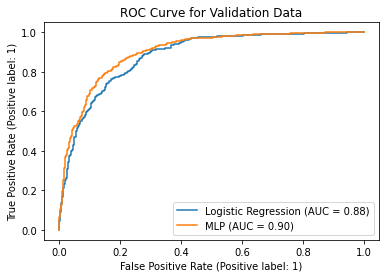

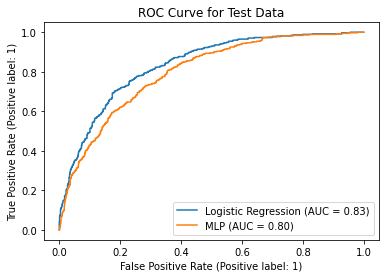

In [90]:
# Plot ROC curves
fig, ax = plt.subplots()
metrics.plot_roc_curve(log_mod, X_valid, y_valid, ax=ax, name='Logistic Regression')
metrics.plot_roc_curve(mlp, X_valid, y_valid, ax=ax, name='MLP')
plt.title('ROC Curve for Validation Data')

fig2, ax2 = plt.subplots()
metrics.plot_roc_curve(log_mod, X_test, y_test, ax=ax2, name='Logistic Regression')
metrics.plot_roc_curve(mlp, X_test, y_test, ax=ax2, name='MLP')
plt.title('ROC Curve for Test Data')


C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\amcre\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_re

Text(0.5, 1.0, 'PR Curve for Test Data')

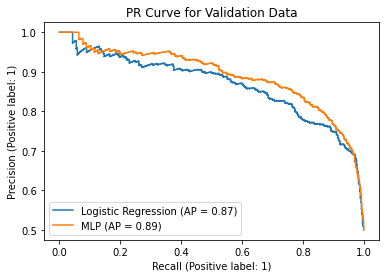

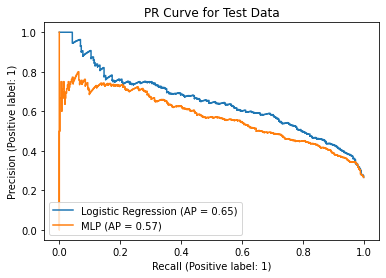

In [91]:
# Plot PR curves
fig, ax = plt.subplots()
metrics.plot_precision_recall_curve(log_mod, X_valid, y_valid, ax=ax, name='Logistic Regression')
metrics.plot_precision_recall_curve(mlp, X_valid, y_valid, ax=ax, name='MLP')
plt.title('PR Curve for Validation Data')

fig2, ax2 = plt.subplots()
metrics.plot_precision_recall_curve(log_mod, X_test, y_test, ax=ax2, name='Logistic Regression')
metrics.plot_precision_recall_curve(mlp, X_test, y_test, ax=ax2, name='MLP')
plt.title('PR Curve for Test Data')

c)

# Question 4: Bayesian Belief Networks [15 pts]



Refer to the Bayesian Network Belief image (uploaded with the notebook on canvas) for this question. 

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(Season = 1) = .001   
P(Atmospheric Pressure = 1) = 0.002


P(Rain = 1 | Season = 0, Atmospheric Pressure = 0) = .001  
P(Rain = 1 | Season = 0, Atmospheric Pressure = 1) = .29  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 0) = .94  
P(Rain = 1 | Season = 1, Atmospheric Pressure = 1) = .95

P(Umbrella = 1 | Rain = 1) = .9  
P(Umbrella = 1 | Rain = 0) = .05

For the given Bayesian network, Compute the following probabilities : 


**(a) [4 pts]** Find the probability that  Umbrella = 0 

<br>
Since the probabilities have to add up to 1, we know that P(Rain = 0 | Season = 0, Atmospheric Pressure = 0) = 0.999, P(Rain = 0 | Season = 0, Atmospheric Pressure = 1) = 0.71, P(Rain = 0 | Season = 1, Atmospheric Pressure = 0) = 0.06, P(Rain = 0 | Season = 1, Atmospheric Pressure = 1) = 0.05. We also know that P(Umbrella = 0 | Rain = 1) = 0.1, and P(Umbrella = 0 | Rain = 0) = 0.95.

<br>
While tedious, if we get all atomic events, it allows us to find all probabilities.

<br>
<br>
<table>
<th>Atomic Event</th> 
<th>Component Probabilities</th>
<th>Atomic Event Probability</th>
<tr>
<td>Season 0, AP 0, Rain 0, Umbrella 0</td>  <td>0.999*0.998*0.999*0.95</td> <td>0.946205</td>
<tr>
<td>Season 0, AP 0, Rain 0, Umbrella 1</td> <td>0.999*0.998*0.999*0.05</td> <td>0.0498</td>
<tr>
<td>Season 0, AP 0, Rain 1, Umbrella 0</td>  <td>0.999*0.998*0.001*0.1</td>  <td>0.0001</td>
<tr>
<td>Season 0, AP 0, Rain 1, Umbrella 1</td>  <td>0.999*0.998*0.001*0.9</td>  <td>0.000897</td> 
<tr>
<td>Season 0, AP 1, Rain 0, Umbrella 0</td>  <td>0.999*0.002*0.71*0.95</td>  <td>0.001348</td>
<tr>
<td>Season 0, AP 1, Rain 0, Umbrella 1</td>  <td>0.999*0.002*0.71*0.05</td>  <td>0.000071</td>
<tr>
<td>Season 0, AP 1, Rain 1, Umbrella 0</td>  <td>0.999*0.002*0.29*0.1</td>  <td>0.000058</td>
<tr>
<td>Season 0, AP 1, Rain 1, Umbrella 1</td>  <td>0.999*0.002*0.29*0.9</td>   <td>0.000521</td>
<tr>
<td>Season 1, AP 0, Rain 0, Umbrella 0</td>  <td>0.001*0.998*0.06*0.95</td>  <td>0.000057</td>
<tr>
<td>Season 1, AP 0, Rain 0, Umbrella 1</td>  <td>0.001*0.998*0.06*0.05</td>  <td>0.000003</td>
<tr>
<td>Season 1, AP 0, Rain 1, Umbrella 0</td>  <td>0.001*0.998*0.94*0.1</td>   <td>0.000094</td>
<tr>
<td>Season 1, AP 0, Rain 1, Umbrella 1</td>  <td>0.001*0.998*0.94*0.9</td>   <td>0.000844</td>
<tr>
<td>Season 1, AP 1, Rain 0, Umbrella 0</td>  <td>0.001*0.002*0.05*0.95</td>  <td>0</td>
<tr>
<td>Season 1, AP 1, Rain 0, Umbrella 1</td>  <td>0.001*0.002*0.05*0.05</td>  <td>0</td>
<tr>
<td>Season 1, AP 1, Rain 1, Umbrella 0</td>  <td>0.001*0.002*0.95*0.1</td>   <td>0</td>
<tr>
<td>Season 1, AP 1, Rain 1, Umbrella 1</td>  <td>0.001*0.002*0.95*0.95</td>  <td>0.000002</td>
<table>
<br>
The cases where Umbrella = 0 are: Season 0, AP 0, Rain 0, Umbrella 0 | Season 0, AP 0, Rain 1, Umbrella 0 | Season 0, AP 1, Rain 0, Umbrella 0 | Season 0, AP 1, Rain 1, Umbrella 0 | Season 1, AP 0, Rain 0, Umbrella 0 | Season 1, AP 0, Rain 1, Umbrella 0 | Season 1, AP 1, Rain 0, Umbrella 0 | Season 1, AP 1, Rain 1, Umbrella 0
<br>
<br>
Now we can just add up the probabilities of the 8 cases where Umbrella = 0 to get: (0.946205+0.0001+0.001348+0.000058+0.000057+0.000094+0+) = <b>0.947861</b>.

<br>
<br>
**(b) [4 pts]** Given that there is low Atmospheric Pressure (Atmospheric Pressure = 0), what is the probability that Rain = 1

To get this probability, we sum the probabilities of all atomic events where AP = 0 AND Rain = 1 divided by the sum of the probabilities of all atomic events where AP = 0. We get <b>0.001939</b>.

<br>
**(c) [7 pts]** Given that it rains(Rain = 1), what is the probability that the it is rainy season (Season = 1)
<br>
<br>
To get this probability, we sum the probabilities of all atomic events where Rain = 1 and Season = 1 divided by the sum of the probabilities of all atomic events where Rain = 1. We get <b>0.373575</b>.


# Question 5: Support Vector Machines [10 pts]

1. [3 pts] Explain in what sense the Support Vector Machine seeks an optimal answer in the space of linear classifiers.
2. [3 pts] Describe how a slack variable works.
3. [4 pts] Explain how the SVM framework can be extended in order to provide non-linear decision boundaries.